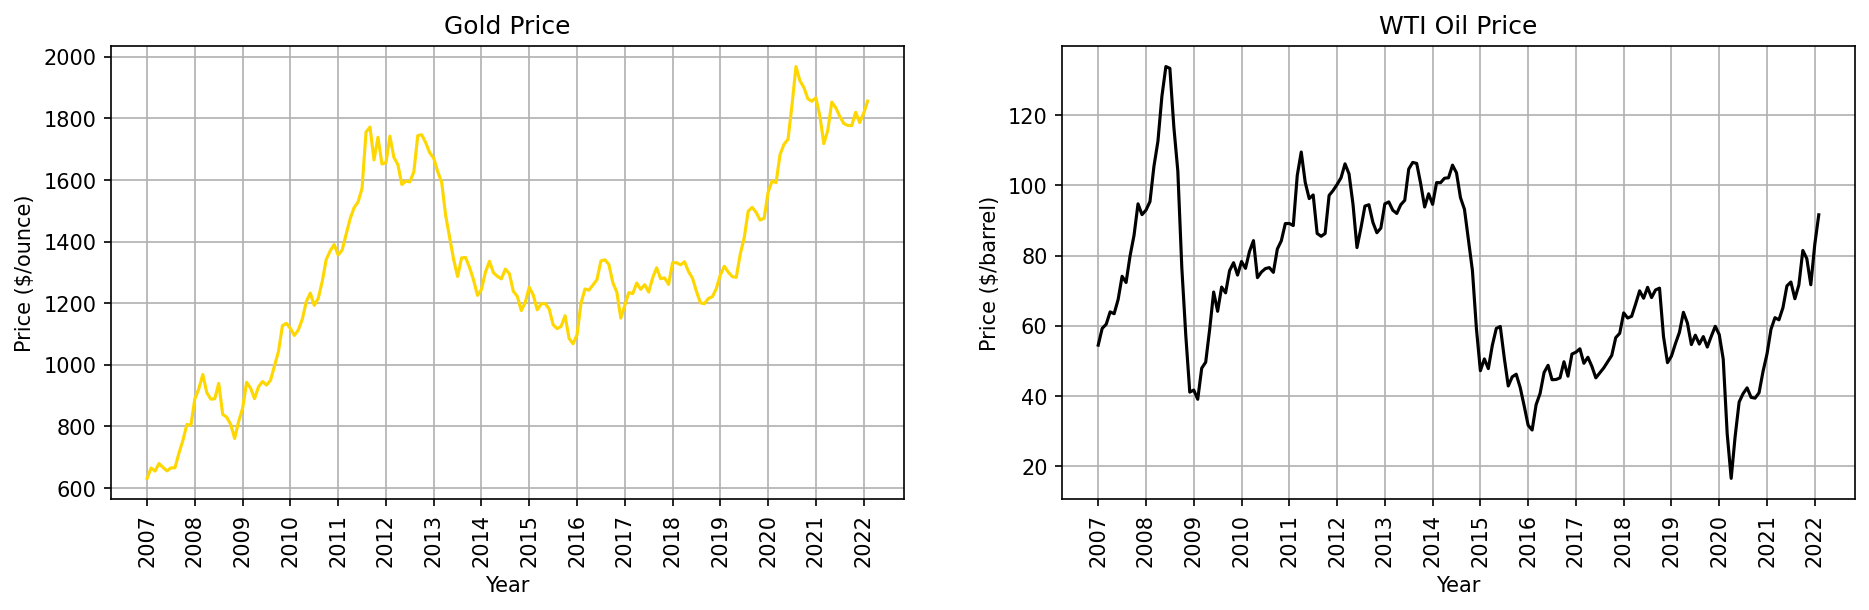

In [44]:
import numpy as np
import matplotlib.pyplot as plt

gold_price = np.loadtxt("Gold_price.csv",delimiter = ",")
gold = gold_price[337:519] #from Jan 2008 to Dec 2017

oil_data = np.loadtxt("Cushing_OK_WTI_Spot_Price_FOB.csv",delimiter = ",")
oil = oil_data[252:] #from Jan 2005 to Feb 2022

plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.xticks(range(0,len(gold)+1,12),range(2007,2023),rotation = 90)
plt.plot(gold, color = 'gold')
plt.title('Gold Price')
plt.xlabel('Year')
plt.ylabel('Price ($/ounce)')
plt.grid()

plt.subplot(1,2,2)
plt.xticks(range(0,len(oil)+1,12),range(2007,2023),rotation = 90)
plt.plot(oil, 'k')
plt.title('WTI Oil Price')
plt.xlabel('Year')
plt.ylabel('Price ($/barrel)')
plt.grid()
plt.savefig("rawdata.pdf")
plt.show()

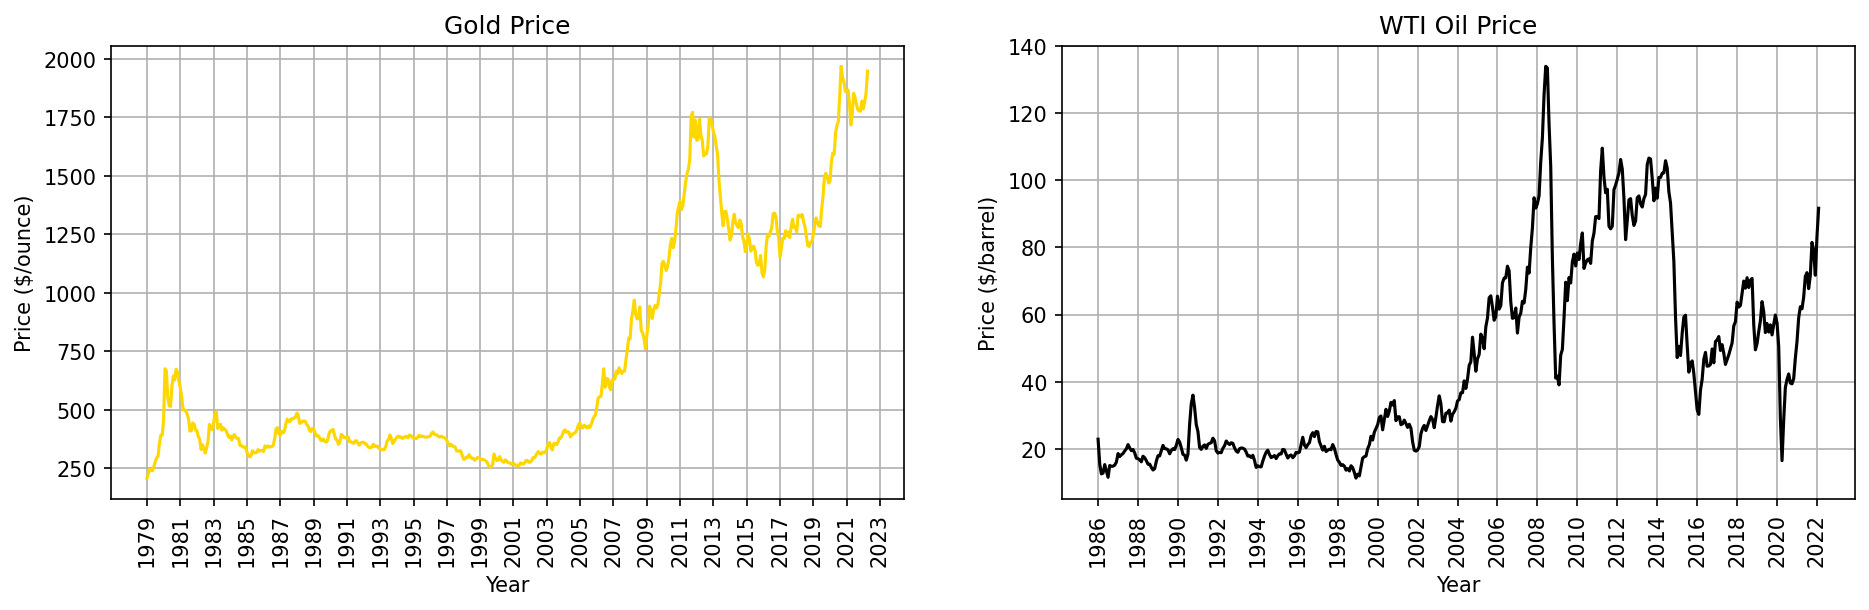

In [31]:
# gold_price1 = np.loadtxt("Gold_Price.csv")
# gold1 = gold_price1 #from Jan 1986 to Feb 2018

# oil_data = np.loadtxt("Cushing_OK_WTI_Spot_Price_FOB.csv",delimiter = ",")
# oil1 = oil_data #from Jan 1986 to Feb 2018


# plt.figure(figsize=(15,4),dpi=150)
# plt.subplot(1,2,1)

# plt.xticks(range(0,len(gold1)+12,12*2),range(1979,2024,2),rotation = 90)
# plt.plot(gold1,color = 'gold')
# plt.title('Gold Price')
# plt.ylabel('Price ($/ounce)')
# plt.xlabel('Year')
# plt.grid()

# plt.subplot(1,2,2)
# plt.xticks(range(0,len(oil1),12*2),range(1986,2024,2),rotation = 90)
# plt.plot(oil1, color ='black')
# plt.title('WTI Oil Price')
# plt.ylabel('Price ($/barrel)')
# plt.xlabel('Year')
# plt.grid()
# plt.savefig("original.pdf")
# plt.show()


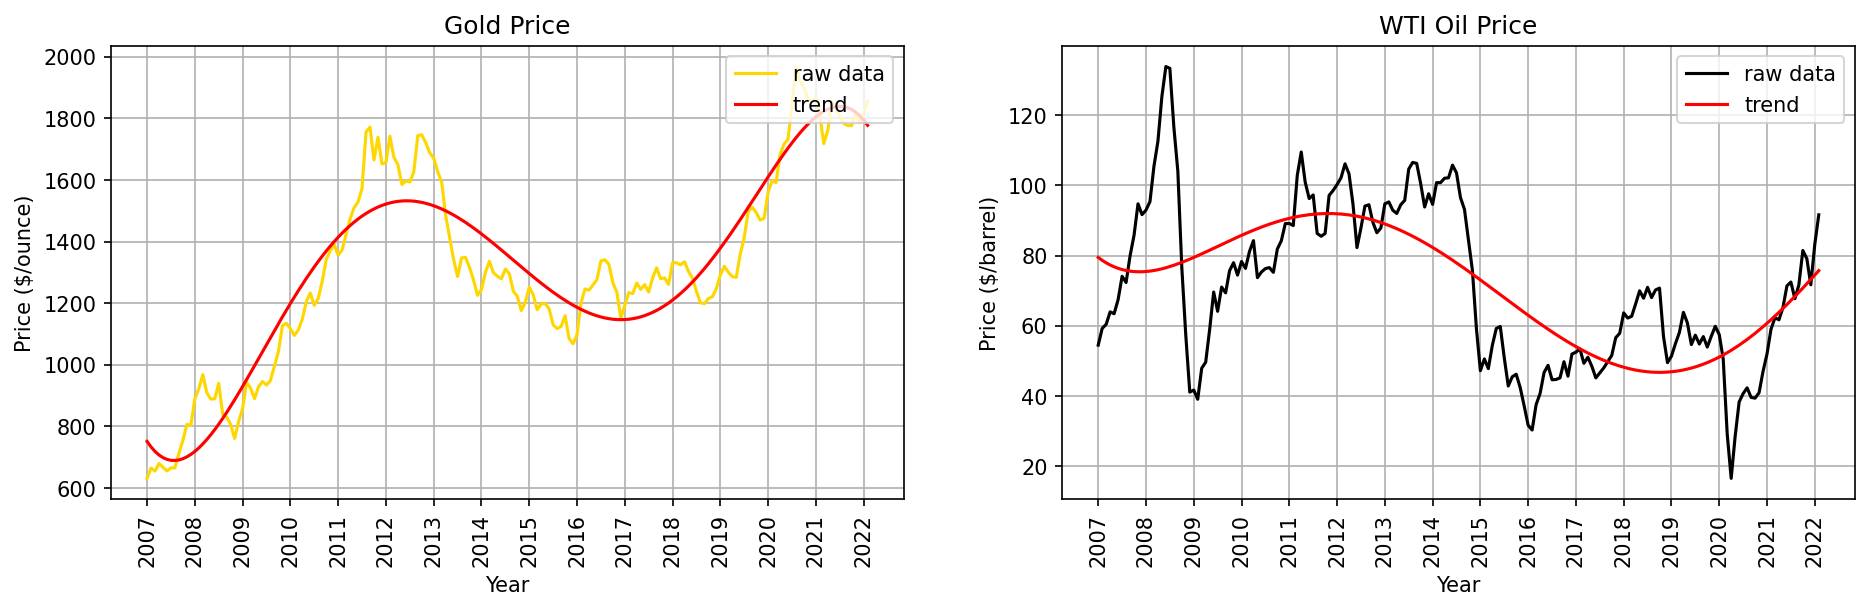

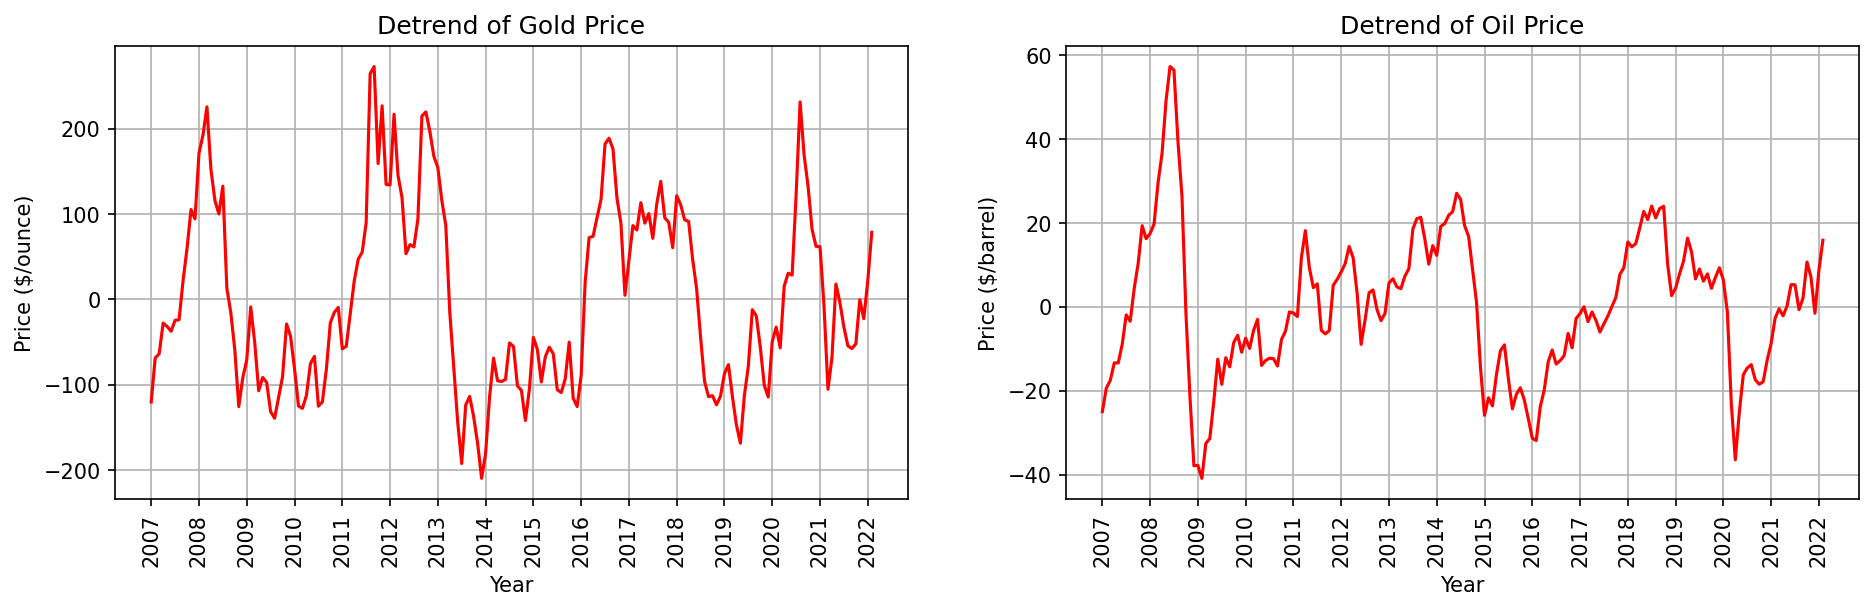

C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


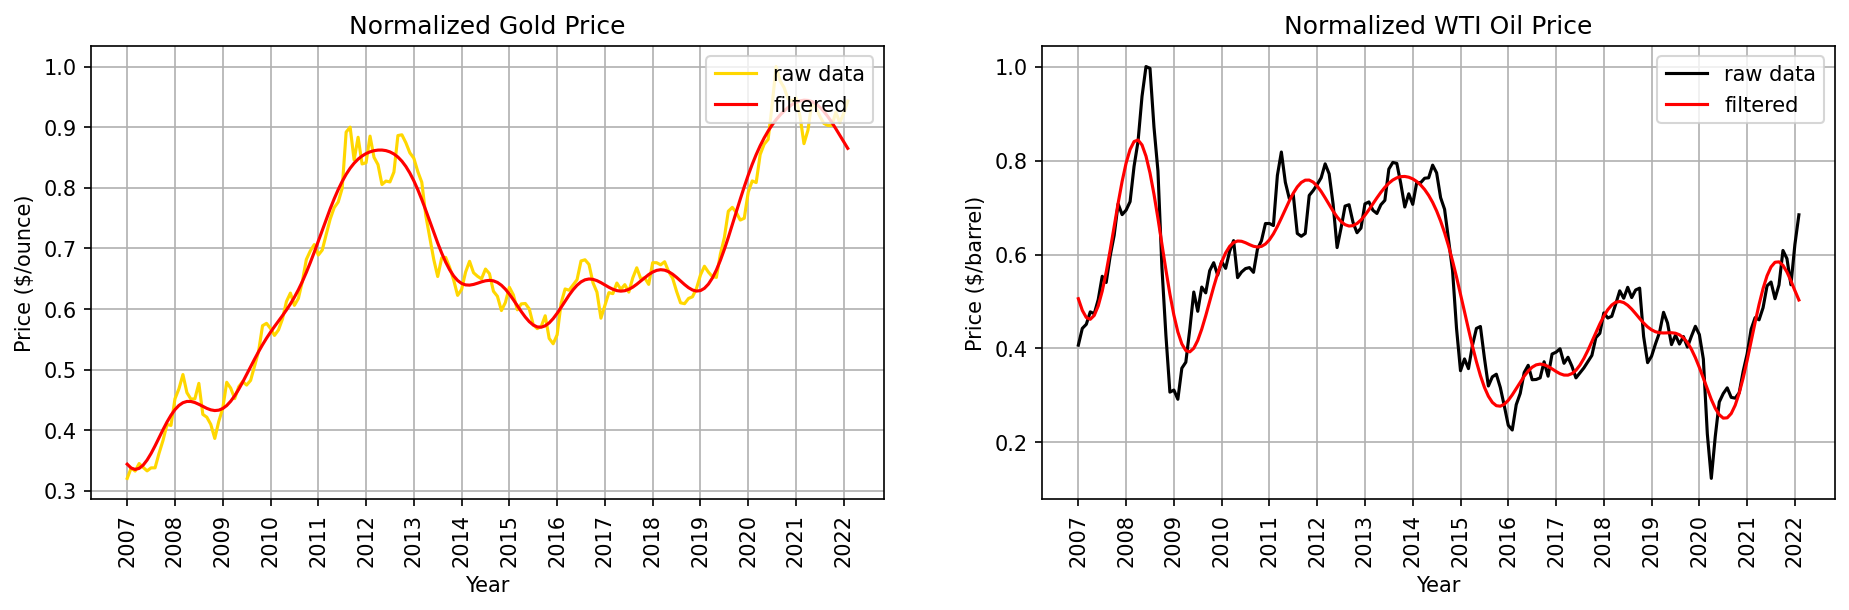

In [46]:
t = np.arange(0,len(gold))
dt = t[1] - t[0]


# polyfit of gold
p_g = np.polyfit(t,gold,5)
# trend of gold
trend_g = np.polyval(p_g,t)
#detrend of gold price data
detrend_g = gold - trend_g

ft_g = (np.fft.fft(detrend_g))
fre_g = (np.fft.fftfreq(len(detrend_g),dt))
for i in range(0,len(fre_g)):
    if np.abs(fre_g[i]) > 0.05:
        ft_g[i] = 0
        
ift_g = np.fft.ifft((ft_g))

# normalized-filtered detrend of gold data
norm_ift_g = ift_g/np.max(gold)
# normalized filtered gold data
norm_ft_g = trend_g/np.max(gold) + norm_ift_g
# normalized gold data
norm_g = gold/np.max(gold)

# trend of oil
p_o = np.polyfit(t,oil,5)
trend_o = np.polyval(p_o,t)

#detrend of oil price data
detrend_o = oil - trend_o

# f-filter
ft_o = (np.fft.fft(detrend_o))
fre_o = (np.fft.fftfreq(len(detrend_o),dt))

# if frequency is greater than 0.05, set the Fourier spectrum corresponding to zero 
for i in range(0,len(fre_o)):
    if np.abs(fre_o[i]) > 0.05:
        ft_o[i] = 0
        
ift_o = np.fft.ifft((ft_o))

# normalized-filtered detrend of oil data
norm_ift_o = ift_o/np.max(oil)
# normalized filtered oil data
norm_ft_o = trend_o/np.max(oil) + norm_ift_o
# normalized oil data
norm_o = oil/np.max(oil)


plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.xticks(range(0,len(gold)+1,12),range(2007,2023),rotation = 90)
plt.plot(gold, label = 'raw data',color = 'gold')
plt.plot(trend_g, label = 'trend' ,color ='red')
plt.title('Gold Price')
plt.ylabel('Price ($/ounce)')
plt.xlabel('Year')
plt.legend( loc = 'upper right')
plt.grid()

plt.subplot(1,2,2)
plt.xticks(range(0,len(oil)+1,12),range(2007,2023),rotation = 90)
plt.plot(oil, label = 'raw data', color ='black')
plt.plot(trend_o, label = 'trend', color = 'red')
plt.title('WTI Oil Price')
plt.ylabel('Price ($/barrel)')
plt.xlabel('Year')
plt.legend(loc = 'upper right')
plt.grid()
plt.savefig("polyfit.pdf")
plt.show()



plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.xticks(range(0,len(gold)+1,12),range(2007,2023),rotation = 90)
plt.plot(detrend_g, 'r')
plt.title('Detrend of Gold Price')
plt.xlabel('Year')
plt.ylabel('Price ($/ounce)')
plt.grid()
plt.subplot(1,2,2)
plt.xticks(range(0,len(oil)+1,12),range(2007,2023),rotation = 90)
plt.plot(detrend_o, 'r')
plt.title('Detrend of Oil Price')
plt.ylabel('Price ($/barrel)')
plt.xlabel('Year')
plt.grid()
plt.savefig("detrend.pdf")
plt.show()



plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.xticks(range(0,len(gold)+1,12),range(2007,2023),rotation = 90)
plt.plot(norm_g, label = 'raw data',color = 'gold')
plt.plot(norm_ft_g, label = 'filtered' ,color ='red')
plt.title('Normalized Gold Price')
plt.ylabel('Price ($/ounce)')
plt.xlabel('Year')
plt.legend( loc = 'upper right')
plt.grid()

plt.subplot(1,2,2)
plt.xticks(range(0,len(oil)+1,12),range(2007,2023),rotation = 90)
plt.plot(norm_o, label = 'raw data', color ='black')
plt.plot(norm_ft_o, label = 'filtered', color = 'red')
plt.title('Normalized WTI Oil Price')
plt.ylabel('Price ($/barrel)')
plt.xlabel('Year')
plt.legend(loc = 'upper right')
plt.grid()
plt.savefig("filtered.pdf")
plt.show()




In [47]:
def cross(x,y):
    z1 = np.zeros(len(x)-1)
    f = np.append(x,z1)
    F = np.fft.fft(f)*dt
    z2 = np.zeros(len(y)-1)
    g = np.append(y,z2)
    G = np.fft.fft(g)*dt
    C = np.conj(F)*G
    c = np.fft.fftshift(np.fft.ifft(C)/dt)
    return c

C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


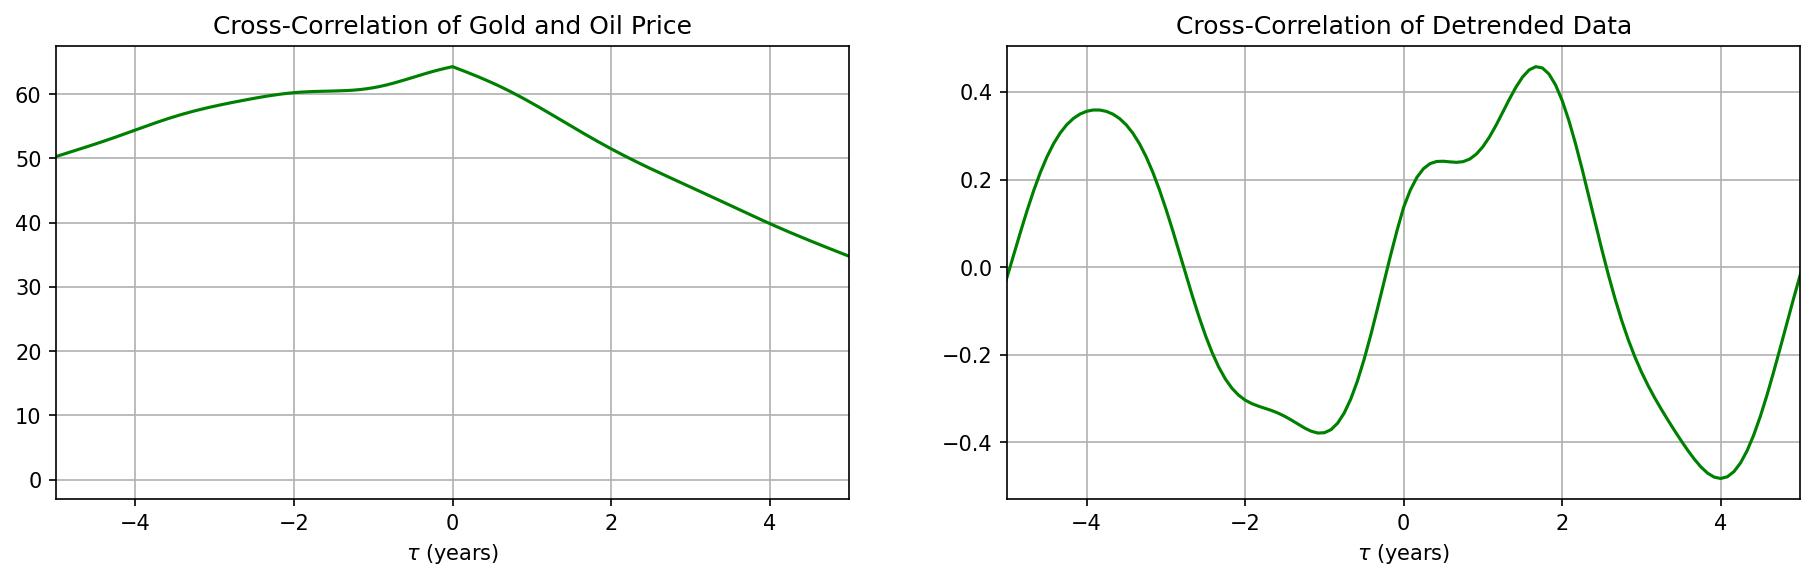

C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Seunghyun Park\anaconda3\envs\PHY408\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


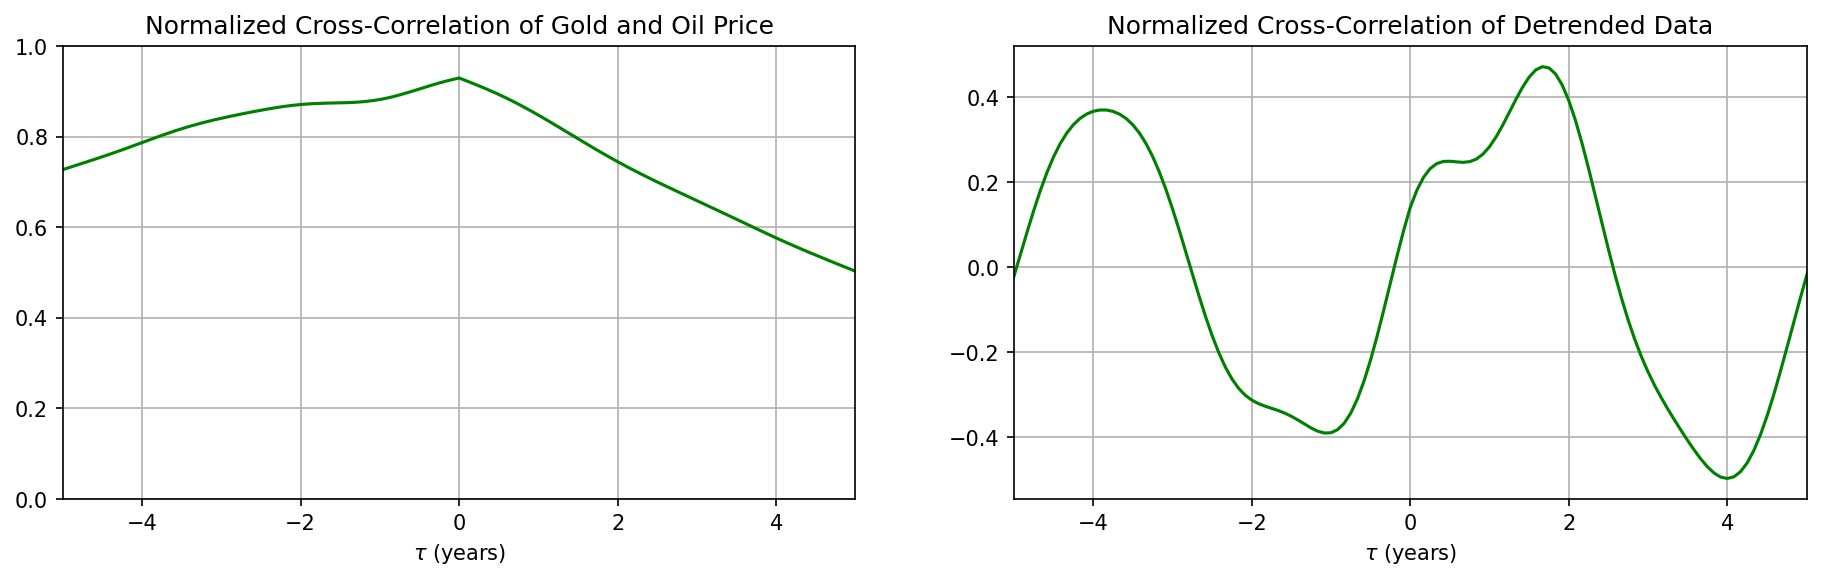

In [50]:
tau = np.concatenate((-t[::-1]/12,t[1::1]/12))

plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.plot(tau,cross(norm_ft_g,norm_ft_o), color ='green')
plt.xlim(-5,5)
plt.title('Cross-Correlation of Gold and Oil Price')
plt.xlabel('$\\tau$ (years)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(tau,cross(norm_ift_g,norm_ift_o), color ='green')
plt.xlim(-5,5)
plt.title('Cross-Correlation of Detrended Data')
plt.xlabel('$\\tau$ (years)')
plt.grid()
plt.savefig("crosscorrelation.pdf")
plt.show()


# Normalizinig  Cross-Correlation
cc = cross(norm_ft_g,norm_ft_o)/np.sqrt(sum(abs(norm_ft_g)**2)*sum(abs(norm_ft_o)**2))
# Normalizinig  Cross-Correlation of Detrend
cc_i = cross(norm_ift_g,norm_ift_o)/np.sqrt(sum(abs(norm_ift_g)**2)*sum(abs(norm_ift_o)**2))
plt.figure(figsize=(15,4),dpi=150)
plt.subplot(1,2,1)
plt.plot(tau,cc, color ='green')
plt.ylim(0,1)
plt.xlim(-5,5)
plt.title('Normalized Cross-Correlation of Gold and Oil Price')
plt.xlabel('$\\tau$ (years)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(tau,cc_i, color ='green')
plt.xlim(-5,5)
plt.title('Normalized Cross-Correlation of Detrended Data')
plt.xlabel('$\\tau$ (years)')
plt.grid()
plt.savefig("normalizedcrosscorrelation.pdf")
plt.show()